RA1911028010091

SIDHARTH MANOJ

COMPARISON BETWEEN DESCISION TREE AND RANDOM FOREST


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

# Importing dataset
df=pd.read_csv(r'C:\Users\sm196\Downloads\dta.csv')
df.head()

In [17]:
# Data Preprocessing and null values imputation
# Label Encoding
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

#Null Value Imputation
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df[rev_null]=df[rev_null].replace({np.nan:df['Gender'].mode(),
                                   np.nan:df['Married'].mode(),
                                   np.nan:df['Dependents'].mode(),
                                   np.nan:df['Self_Employed'].mode(),
                                   np.nan:df['Credit_History'].mode(),
                                   np.nan:df['LoanAmount'].mean(),
                                   np.nan:df['Loan_Amount_Term'].mean()})

In [18]:
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (491, 11)
Shape of X_test=> (123, 11)
Shape of Y_train=> (491,)
Shape of Y_test=> (123,)


In [20]:
# Building Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt.fit(X_train, Y_train)
dt_pred_train = dt.predict(X_train)

In [21]:
# Evaluation on Training set
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,dt_pred_train))

Training Set Evaluation F1-Score=> 1.0


In [22]:
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,dt_pred_test))

Testing Set Evaluation F1-Score=> 0.7953216374269005


In [23]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, Y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))

Training Set Evaluation F1-Score=> 0.992679355783309


C:\Users\sm196\Anaconda3\envs\python-cvcourse\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [24]:
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.7951807228915662


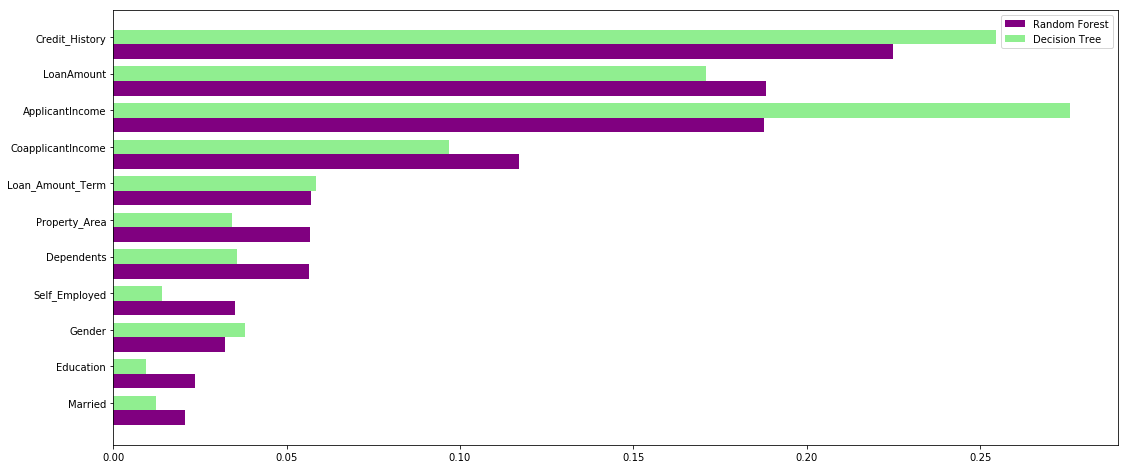

In [25]:
feature_importance=pd.DataFrame({
    'rfc':rfc.feature_importances_,
    'dt':dt.feature_importances_
},index=df.drop(columns=['Loan_ID','Loan_Status']).columns)
feature_importance.sort_values(by='rfc',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)

ax.legend()
plt.show()

CONCLUSION:-
The decision tree model gives high importance to a particular set of features. But the random forest chooses features randomly during the training process. Therefore, it does not depend highly on any specific set of features. This is a special characteristic of random forest over bagging trees.Therefore, the random forest can generalize over the data in a better way. This randomized feature selection makes random forest much more accurate than a decision tree.

